In [2]:
import numpy as np
from noisy_mnist import dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
%matplotlib inline

Using TensorFlow backend.


Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\innopolis\Anaconda3\envs\datamining\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	0.56s	69432	0.602	0.650	0.625	0.465	0.598	0.146


C:\Users\innopolis\Anaconda3\envs\datamining\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


random   	0.26s	69694	0.669	0.710	0.689	0.553	0.666	0.147


C:\Users\innopolis\Anaconda3\envs\datamining\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


PCA-based	0.04s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


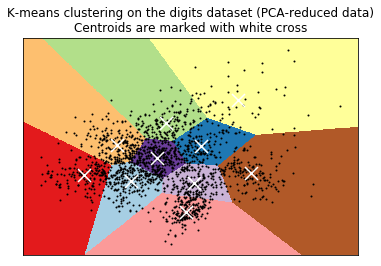

In [28]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
noise, clean = dataset()
from sklearn.model_selection import train_test_split
noisy_train, noisy_test, clean_train, clean_test = train_test_split(noise, clean)

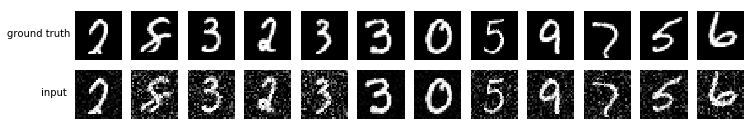

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

w = 1.0
ncols = 12
idx = np.random.choice(len(clean_test), size=ncols)
fig, axs = plt.subplots(nrows=2, ncols=ncols, figsize=(ncols*w, 2*w))
for col, (lower, upper, i) in enumerate(zip(axs[1], axs[0], idx)):
    if col == 0:
        upper.text(-40, 15, 'ground truth')
        lower.text(-20, 15, 'input')
    clean = clean_train[i].reshape(28, 28)
    noisy = noisy_train[i].reshape(28, 28)
    kwargs = {'cbar': False, 'xticklabels': False, 'yticklabels': False, 'cmap': 'gray'}
    sns.heatmap(clean, ax=upper, **kwargs)
    sns.heatmap(noisy, ax=lower, **kwargs)
plt.show()

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
import skorch

In [10]:
from toolz import partial
      
def _initialize(method, layer, gain=1):
    weight = layer.weight.data
    _before = weight.data.clone()
    kwargs = {'gain': gain} if 'xavier' in str(method) else {}
    method(weight.data, **kwargs)
    assert torch.all(weight.data != _before)
    
class Autoencoder(nn.Module):
    """ Autoencoder adapted from [1]
    
    [1]:https://github.com/Kaixhin/Autoencoders/blob/master/models/ConvAE.lua
    """
    def __init__(self, activation='ReLU', init='xavier_uniform_', width_factor=1):
        super().__init__()
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.activation = activation
        self.init = init
        
        init_method = getattr(torch.nn.init, init)
        act_layer = getattr(nn, activation)
        print(act_layer)
       
        gain = 1
        if self.activation in ['LeakyReLU', 'ReLU']:
            name = 'leaky_relu' if self.activation == 'LeakyReLU' else 'relu'
            gain = torch.nn.init.calculate_gain(name)
        if self.activation != 'PReLU':
            act_layer = partial(act_layer, inplace=True)
        
        width = int(width_factor * 32)
        layers = [nn.Conv2d(1, width, kernel_size=3, padding=1, stride=1),
                  act_layer(),
                  nn.MaxPool2d(2, stride=2, padding=1),
                  nn.Conv2d(width, width, kernel_size=3, padding=1, stride=1),
                  act_layer(),
                  nn.MaxPool2d(2, stride=2, padding=0)]
        for layer in layers:
            if hasattr(layer, 'weight') and layer.weight.data.dim() > 1:
                _initialize(init_method, layer)
            
        self.encoder = nn.Sequential(*layers).to(device)
        
        modules = []
        modules += [[nn.Conv2d(width, width, kernel_size=3, stride=1, padding=1),
                    act_layer()]]
        modules += [[nn.Conv2d(width, width, kernel_size=3, stride=1, padding=1),
                    act_layer()]]
        modules += [[nn.Conv2d(width, 1, kernel_size=3, stride=1, padding=1),
                    nn.Sigmoid()]]
        self.decoders = []
        for module in modules:
            [_initialize(init_method, layer) for layer in module
             if hasattr(layer, 'weight') and layer.weight.data.dim() > 1]
            self.decoders += [nn.Sequential(*module).to(device)]
        
    def forward(self, x):
        x = self.encoder(x)
                  
        for i, decoder in enumerate(self.decoders):
            x = decoder(x)
            if i < len(self.decoders) - 1:
                x = F.interpolate(x, scale_factor=2)
        return x

In [11]:
from pprint import pprint
class Trim(skorch.NeuralNetRegressor):
    """
    This wrapper trims the arguments in `params` to make 
    sure they're accepted by the optimizer
    """
    def __init__(self, verbose=True, **kwargs):
        if kwargs['optimizer'] != 'Adam':
            kwargs.pop('optimizer__amsgrad', None)
        if kwargs['optimizer'] == 'Adam':
            kwargs.pop('optimizer__lr', None)
        if kwargs['optimizer'] != 'SGD':
            kwargs.pop('optimizer__nesterov')
            kwargs.pop('optimizer__momentum')
        kwargs['optimizer'] = getattr(torch.optim, kwargs['optimizer'])
        pprint({k: v for k, v in kwargs.items() if k != 'module'})
        super().__init__(**kwargs)

params = {
    'module__init': ['xavier_uniform_',
                     'xavier_normal_',
                     'kaiming_uniform_',
                     'kaiming_normal_',
                    ],
    'module__activation': ['ReLU', 'LeakyReLU', 'ELU', 'PReLU'],
    'optimizer': ['SGD',
                  'ASGD',
                  'Adam',
                  'Adagrad',
                  'RMSprop'],  # optimizers in Adam's paper + ASGD
    'batch_size': [32, 64, 128, 256, 512],
    'optimizer__lr': np.logspace(2, -2, num=1000),  # all optimizers but Adam
    'optimizer__weight_decay': [0] + np.logspace(-8, -3, num=1000).tolist(),  # all optimizers
    'optimizer__nesterov': [True],  # only for SGD
    'optimizer__momentum': np.logspace(-4, 0, num=1000),  # only for SGD
}

In [14]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms

device = 'cpu'
model = Autoencoder()
if torch.cuda.is_available():
    device = 'cuda'
    model = model.to('cuda')
    
net = Trim(
    module=model,
    module__init='xavier_uniform_',
    module__activation='PReLU',
    max_epochs=20,
    optimizer='Adam',
    optimizer__lr=1.0,
    optimizer__weight_decay=1e-5,
    optimizer__nesterov=True,
    optimizer__momentum=1e-2,
    batch_size=64,
    # train_split=None,  # if only use training data; we will eventually
    #criterion=torch.nn.MSELoss,
    criterion=torch.nn.BCELoss,
    device='cuda',
    warm_start=True,
)

<class 'torch.nn.modules.activation.ReLU'>
{'batch_size': 64,
 'criterion': <class 'torch.nn.modules.loss.BCELoss'>,
 'device': 'cuda',
 'max_epochs': 20,
 'module__activation': 'PReLU',
 'module__init': 'xavier_uniform_',
 'optimizer': <class 'torch.optim.adam.Adam'>,
 'optimizer__weight_decay': 1e-05,
 'warm_start': True}


In [15]:
net.fit(noisy_train, clean_train)

Re-initializing module because the following parameters were re-set: activation, init.
<class 'torch.nn.modules.activation.PReLU'>


AssertionError: 
The NVIDIA driver on your system is too old (found version 6050).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

In [ ]:
clean_test_hat = net.forward(noisy_test)

In [ ]:
w = 1.0
ncols = 12
# idx = np.random.choice(len(clean_test), size=ncols)

fig, axs = plt.subplots(nrows=3, ncols=ncols, figsize=(ncols*w, 3*w))
for col, (lower, middle, upper, i) in enumerate(zip(axs[2], axs[1], axs[0], idx)):
    if col == 0:
        upper.text(-40, 15, 'ground truth')
        middle.text(-20, 15, 'input')
        lower.text(-25, 15, 'output')

    i = np.random.randint(len(clean_test))
    clean = clean_test[i].reshape(28, 28)
    predicted = clean_test_hat[i].reshape(28, 28)
    noisy = noisy_test[i].reshape(28, 28)
    kwargs = {'cbar': False, 'xticklabels': False, 'yticklabels': False, 'cmap': 'gray'}
    sns.heatmap(clean, ax=upper, **kwargs)
    sns.heatmap(noisy, ax=middle, **kwargs)
    sns.heatmap(predicted, ax=lower, **kwargs)
plt.show()